In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from DE_library import simulate_ODE, simulate_trajectories, plotting
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Kuramoto oscillator

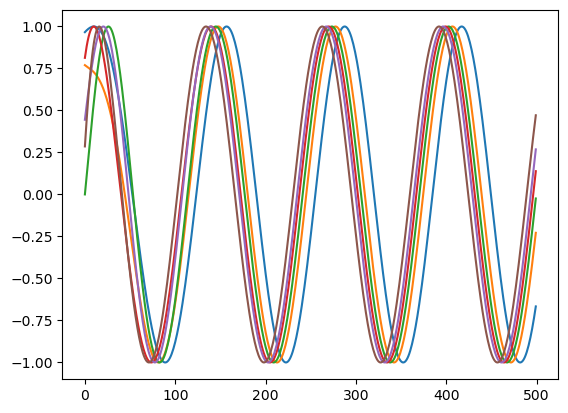

In [4]:
t0, t1, dt = 0, 5, 0.01
t = np.arange(t0, t1, dt)

oscN = 6
X0 = rng.uniform(0, np.pi, size=oscN)
W = rng.uniform(1,10, size=oscN)
K = 1.*(rng.uniform(size=(oscN, oscN))>0.5)
K = np.triu(K, k=1) + np.triu(K, k=1).T

phi, d_phi = simulate_ODE('kuramoto', t, X0, par = {'W': W, 'K': K})

plt.plot(np.sin(phi))
plt.show()

# Bogdanov-Takens system

In [5]:
t0, t1, dt = 0, 5, 0.05
t = np.arange(t0, t1, dt)

X0_range = np.random.uniform(low=[-1,-1], high=[1,1], size=(100,2))

(-1.0, 1.0)

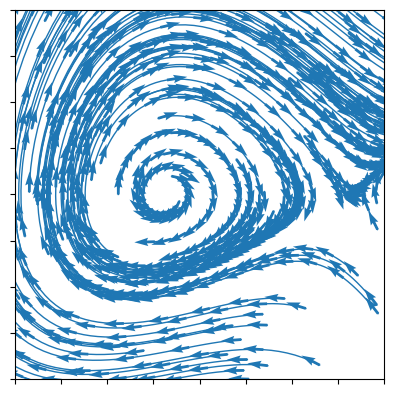

In [6]:
pos, vel = simulate_trajectories('bogdanov_takens', X0_range, t, par = {'beta1': -0.15, 'beta2': -0.6})

ax = None
for p, v in zip(pos, vel):
    ax = plotting.trajectories(p, v, ax=ax, style='->', lw=1, arrowhead=.03, arrow_spacing=7, axis=False, alpha=None)
ax.axis('square')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

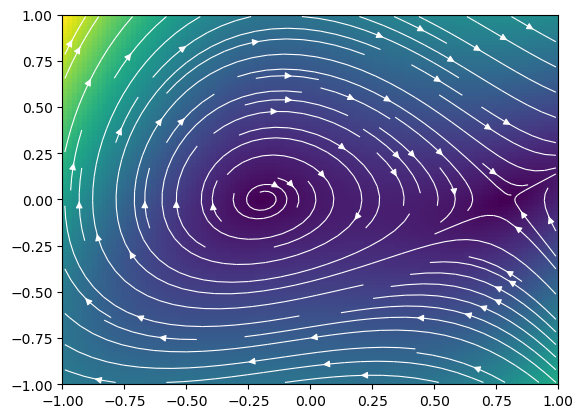

In [48]:
pos, vel = simulate_phase_portrait('bogdanov_takens', [[-1,1], [-1,1]], par = {'beta1': -0.15, 'beta2': -0.6})
plt.streamplot(pos[0], pos[1], vel[0], vel[1], color='white', density=1, arrowsize=1,
                  linewidth=1*.8)
norm_field = np.sqrt(vel[0] ** 2 + vel[1] ** 2)
mappable = plt.pcolor(pos[0], pos[1], norm_field)

<AxesSubplot:>

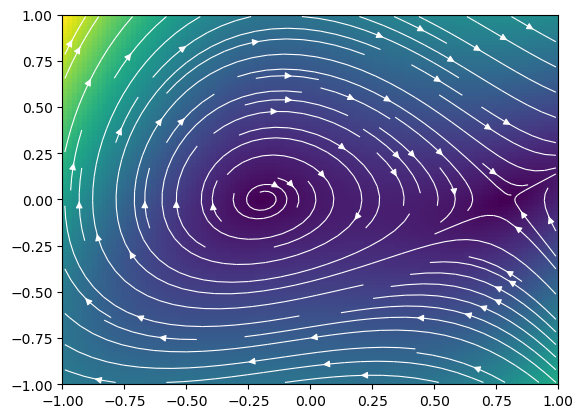

In [51]:
plotting.phase_portrait('bogdanov_takens', [[-1,1], [-1,1]], par = {'beta1': -0.15, 'beta2': -0.6})